# Assignment 2 for Machine Learning
# A question of going down Mt.Fuji

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [72]:
alpha = 0.2
n_points = 300
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [73]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


# Problem 1: Graph Fuji

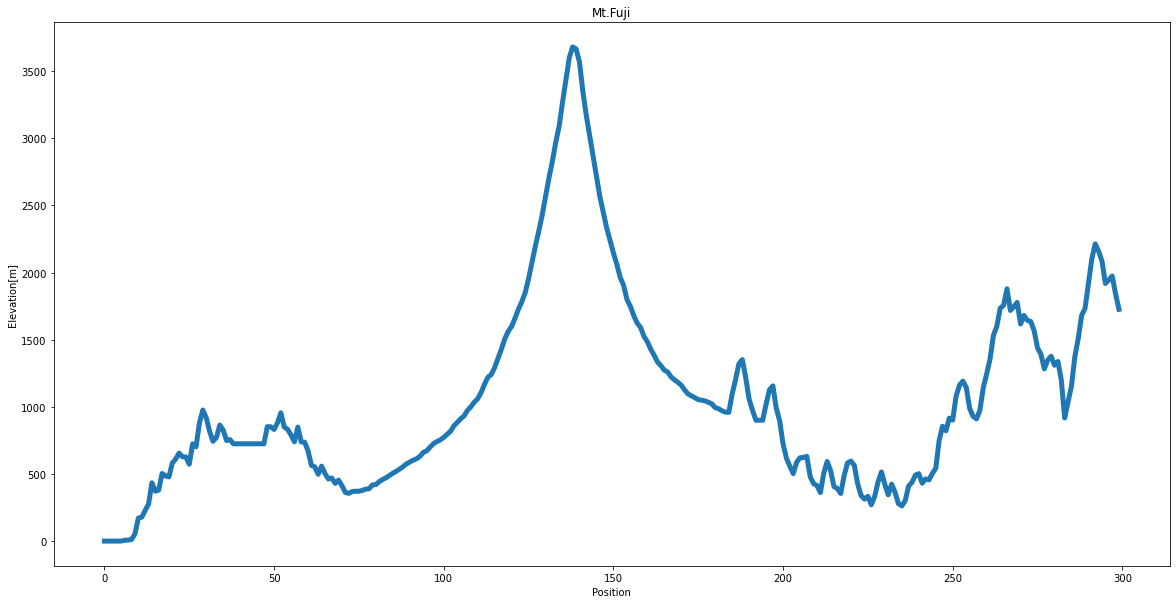

In [74]:
plt.figure(figsize=(20,10))
plt.title("Mt.Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation[m]")
plt.plot(fuji[:, 0], fuji[:, 3], linewidth = 5)
plt.show()

# Problem 2: Create a function to calculate the slope of a point


In [75]:
def cal_slope(nd_array):
    dxy = nd_array[1:, ] - nd_array[:-1, ]
    gradient = dxy[:, 3]/ dxy[:, 0]
    
    return gradient

# Problem 3: Create a function to calculate the destination

In [76]:
gradient = cal_slope(fuji)

def cal_dest(curr_point, gradient, alpha ):
    dest_point = round(curr_point - (alpha * gradient[curr_point]))
    
    return dest_point

# Problem 4: Creating a function to go down the mountain

In [117]:
def create_dest(curr_point, gradient, alpha):
    dest_point_array = np.array([curr_point]) 
    while True:
        dest_point_array = np.append(dest_point_array, cal_dest(dest_point_array[-1], gradient, alpha))
        if dest_point_array[-1] in dest_point_array[:-1]:
            return dest_point_array
dest_point_array = create_dest(136,  gradient, alpha = 0.2)
print("Destination Point with alpla = 0.2, initial start = 136:\n{}".format(dest_point_array))

Destination Point with alpla = 0.2, initial start = 136:
[136 103  98  95  89  86  83  80  76  74  74]


# Problem 5: Visualization of the decent process

Displaying move points when decending

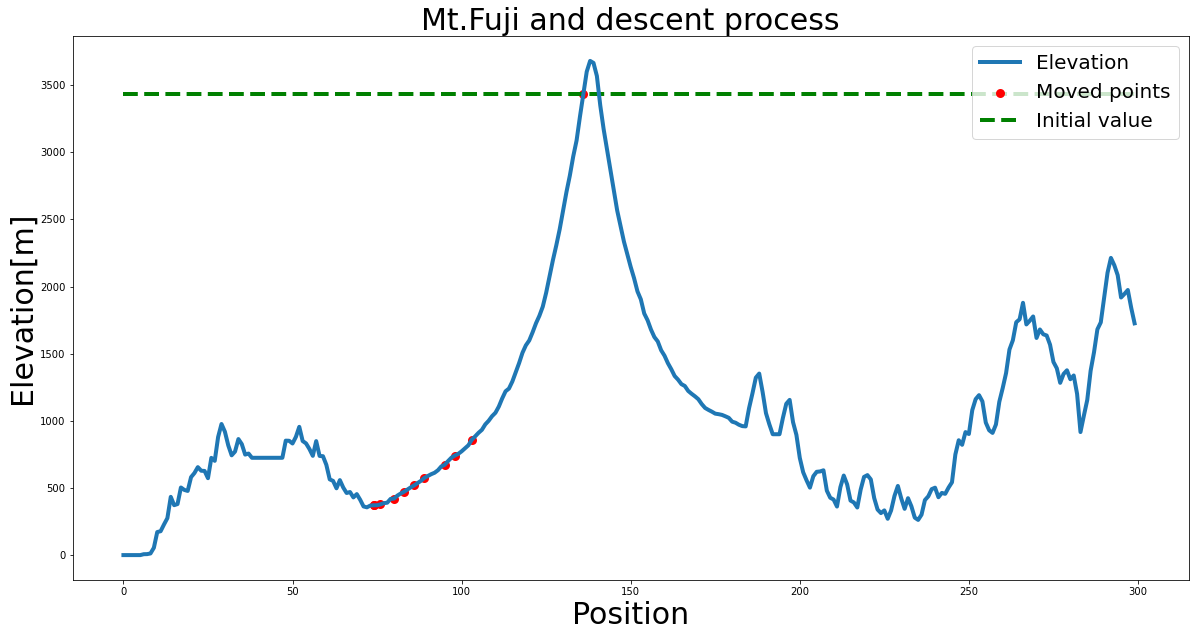

In [113]:

plt.figure(figsize = (20, 10))
plt.title("Mt.Fuji and descent process", fontsize = 30 )
plt.xlabel("Position", fontsize = 30)
plt.ylabel("Elevation[m]", fontsize = 30)

plt.scatter(dest_point_array, fuji[dest_point_array, 3], 25 , color='red', marker='o', label = "Moved points", linewidth = 4)

plt.plot(fuji[:, 0], fuji[:, 3], label = "Elevation", linewidth = 4)

plt.hlines(fuji[dest_point_array[0], 3], 0, 300, "green", linestyles= "dashed", label = "Initial value", linewidth = 4)

plt.legend(fontsize = 20)
plt.show()

Elevation with respective slope graph 

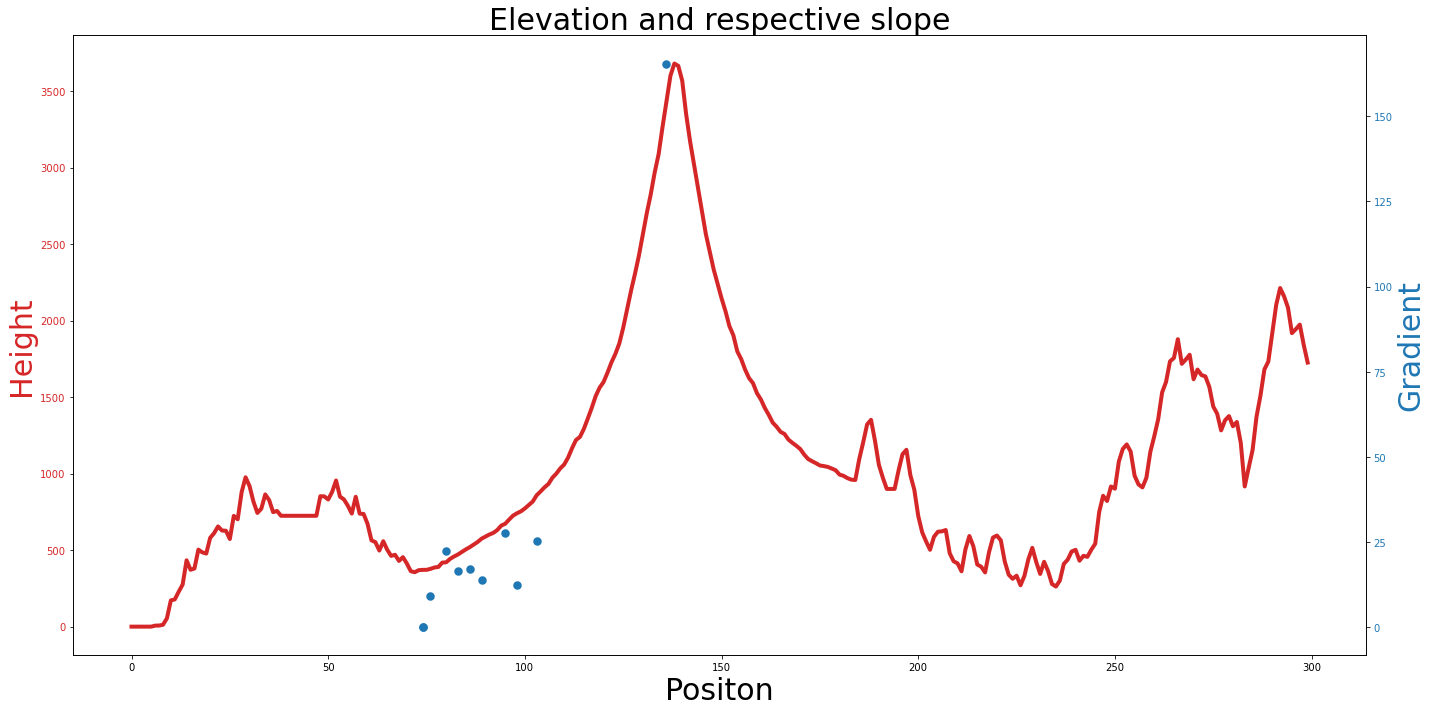

In [114]:

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_title('Elevation and respective slope', fontsize = 30 )
ax1.set_xlabel('Positon', fontsize = 30 )
ax1.set_ylabel('Height', color=color, fontsize = 30 )
ax1.plot(fuji[:, 0], fuji[:, 3], color=color, linewidth = 4)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Gradient', color=color, fontsize = 30 )  
ax2.scatter(dest_point_array, gradient[dest_point_array], 20, label = "Gradient", color=color, marker = "o", linewidth = 4)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
plt.show()

Altitude and slope for each iteration graph

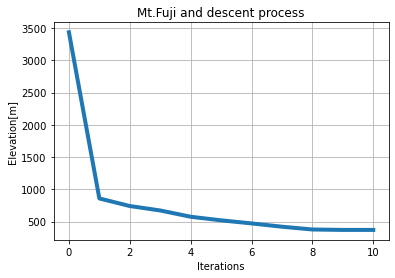

In [115]:

plt.title("Mt.Fuji and descent process")
plt.xlabel("Iterations")
plt.ylabel("Elevation[m]")

plt.plot( fuji[dest_point_array, 3], label = "Elevation", linewidth = 4)
plt.grid()
plt.show()


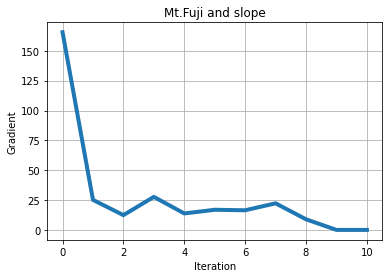

In [116]:
plt.title("Mt.Fuji and slope")
plt.xlabel("Iteration")
plt.ylabel("Gradient")

plt.plot( gradient[dest_point_array], label = "Elevation", linewidth = 4)
plt.grid()
plt.show()

# Problem 6 and 7: Change the initial value and alpha

- Initial point = 142
- Alpha = 0.1

In [122]:
dest_point_array_1 = create_dest(142,  gradient, alpha = 0.1)
print("Destination with new initial value: \n {}".format(dest_point_array_1))

Destination with new initial value: 
 [142 157 160 166 170 174 175 175]


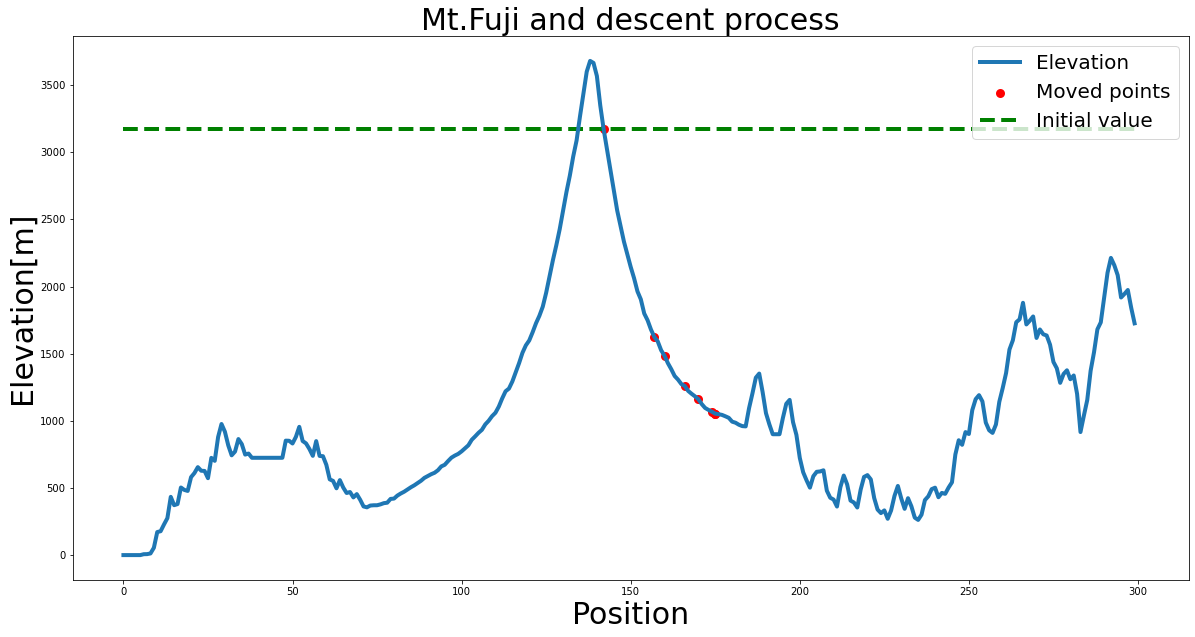

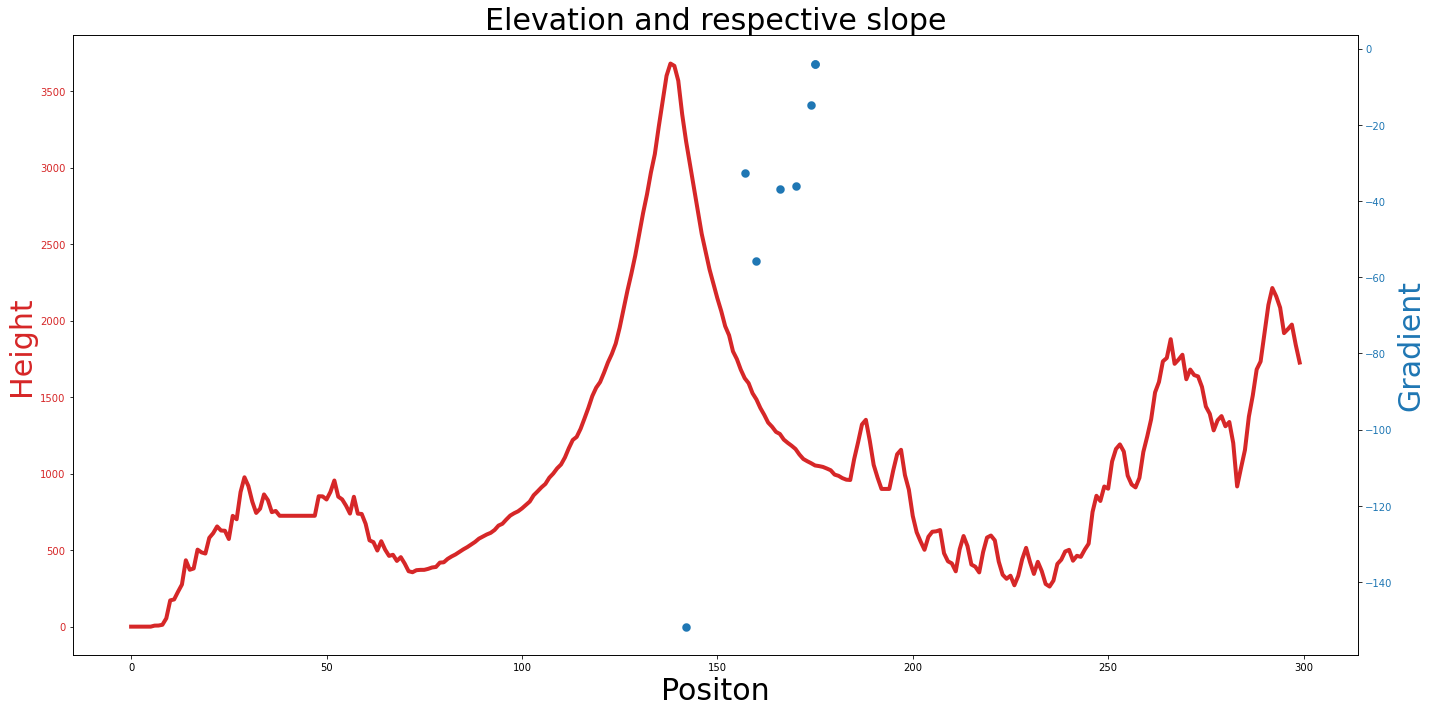

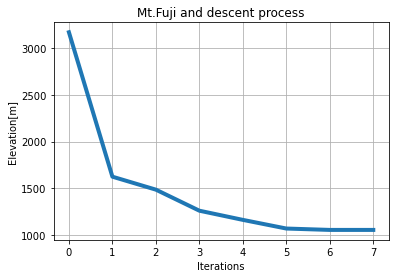

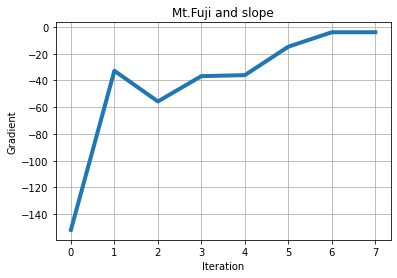

In [126]:
plt.figure(figsize = (20, 10))
plt.title("Mt.Fuji and descent process", fontsize = 30 )
plt.xlabel("Position", fontsize = 30)
plt.ylabel("Elevation[m]", fontsize = 30)

plt.scatter(dest_point_array, fuji[dest_point_array_1, 3], 25 , color='red', marker='o', label = "Moved points", linewidth = 4)

plt.plot(fuji[:, 0], fuji[:, 3], label = "Elevation", linewidth = 4)

plt.hlines(fuji[dest_point_array_1[0], 3], 0, 300, "green", linestyles= "dashed", label = "Initial value", linewidth = 4)

plt.legend(fontsize = 20)
plt.show()

####################################################################

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_title('Elevation and respective slope', fontsize = 30 )
ax1.set_xlabel('Positon', fontsize = 30 )
ax1.set_ylabel('Height', color=color, fontsize = 30 )
ax1.plot(fuji[:, 0], fuji[:, 3], color=color, linewidth = 4)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Gradient', color=color, fontsize = 30 )  
ax2.scatter(dest_point_array_1, gradient[dest_point_array_1], 20, label = "Gradient", color=color, marker = "o", linewidth = 4)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
plt.show()

####################################################################

plt.title("Mt.Fuji and descent process")
plt.xlabel("Iterations")
plt.ylabel("Elevation[m]")

plt.plot( fuji[dest_point_array_1, 3], label = "Elevation", linewidth = 4)
plt.grid()
plt.show()

####################################################################

plt.title("Mt.Fuji and slope")
plt.xlabel("Iteration")
plt.ylabel("Gradient")

plt.plot( gradient[dest_point_array_1], label = "Elevation", linewidth = 4)
plt.grid()
plt.show()